### For comparing camera settings 
Using beads (647nm)

In [95]:
import os
import numpy
import glob
import matplotlib.pyplot as plt

import storm_analysis.sa_library.datareader as datareader

# Change directory
os.chdir("D:/gayatri-folder/1_image_quality/new_camera_settings/beads/ROI3")
resolution = 16
img_name = 'contrast_std'
title = 'Comparing camera settings'

In [96]:
def findContrast(image):
    counts = 2**resolution
    bins = numpy.arange(0, counts+1, 1)
    histogram, bin_edges = numpy.histogram(image, bins=bins)
    tail = numpy.max(numpy.nonzero(histogram)) # Used later for computing contrast
    total = numpy.sum(histogram) # No. of pixels
    histogram = histogram/total
    x = numpy.arange(0, counts, 1)
    x = x/(counts-1)
    histogram.shape = (counts,1)
    y = x.dot(histogram)
    x_m = (x - y)*(counts-1)
    z = x - y
    variance = (numpy.power(x_m, 2)).dot(histogram)
    [std] = numpy.power(variance, 0.5)
    sigma = numpy.around((y*(counts-1))+std) # Count value at the first standard deviation
    [ts] = tail-sigma # Let this be contrast
    return std, ts

def showImageHist(image) :
    counts = 2**resolution
    bins = numpy.arange(0, counts+1, 10)
    plt.figure(figsize = (8,8))
    d1 = plt.hist(image.ravel(), bins=bins, alpha=0.5, density= True)
    plt.xlim([400, 1000])
    # plt.ylim([0, 0.0025])
    plt.title('Image Histogram')
    plt.ylabel('Fraction of occurences')
    plt.xlabel('Intensities')
    plt.savefig('img_hist_gain65.png')
    plt.show()

def showContrast(d1) :
    plt.figure(figsize = (20,8))
    plt.bar(d1.keys(), d1.values(), color = 'orange')
    # plt.xlim([0, 2500])
    # plt.ylim([0, 35000])
    plt.title(title)
    plt.ylabel('Contrast')
    plt.xlabel('Camera settings')
    # plt.legend()
    plt.savefig(img_name)
    plt.show()

In [97]:
movies = sorted(glob.glob('*.tif'))
d = {}
for file in movies :
    movie_name = file.rsplit('.tif',1)[0][:] #Edit this!!
    if movie_name in d:
        pass
    else:
        d.update( {movie_name : []} )
    for frame in range(0,1) :
        image = datareader.TifReader(file).loadAFrame(frame).astype(numpy.float64)
        std, contrast = findContrast(image)
        # d[movie_name].append(contrast)
        d[movie_name] = std
        # showImageHist(image)

In [98]:
old_data = ['emgain_0001', 'emgain_0002', 'emgain_0003', 'emgain_extra_0065', 'emgain_0005', 'emgain_0006',  'preamp_0001', 'preamp_0002', 'preamp_0003', 'vsspeed_0001', 'vsspeed_0002', 'vsspeed_0003','vsspeed_0004', 'vsspeed_0005']
new_data = ['EM Gain 1', 'EM Gain 20', 'EM Gain 40', 'EM Gain 65','EM Gain 80', 'EM Gain 100',  'Preamp 1', 'Preamp 2', 'Preamp 3', 'vsspeed 0.3','vsspeed 0.5','vsspeed 0.7','vsspeed 1.5', 'vsspeed 3.3']
d1={}
for i in range(0,14):
    new_key = new_data[i]
    old_key = old_data[i]
    d1[new_key] = d[old_key]

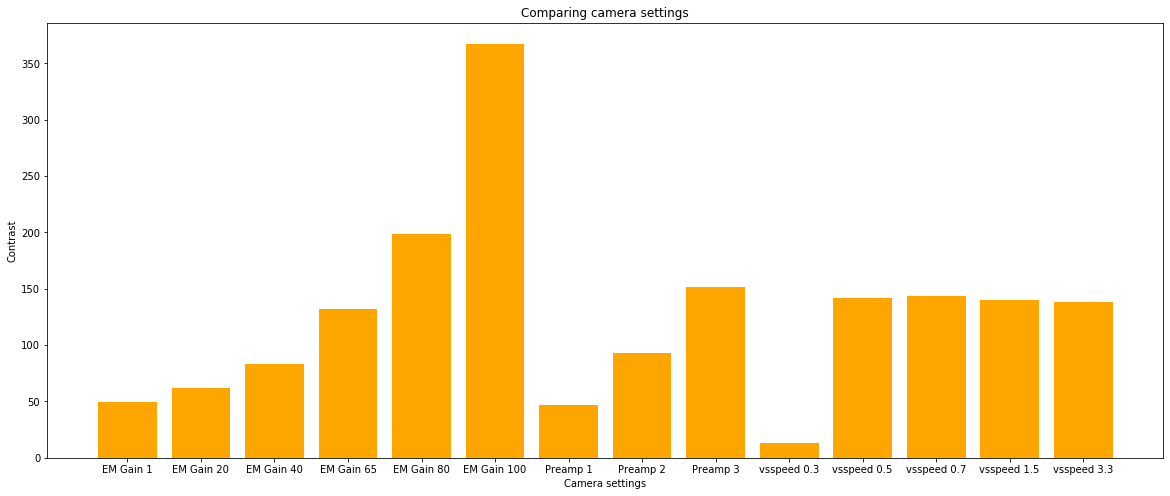

In [99]:
showContrast(d1)

In [100]:
# def sepContrast(d) :
#     max_lim = max(i for v in d.values() for i in v) + 1
#     min_lim = min(i for v in d.values() for i in v) - 1
#     bins = numpy.arange(min_lim, max_lim, 0.1) # fixed bin size
#     plt.figure(figsize = (20,8))
#     # for k in d:
#     plt.hist([d['usapo'], d['uapon'], d['uxapo']], bins=bins, alpha=0.7, label = ['usapo', 'uapon', 'uxapo'], edgecolor='grey', linewidth=0.8)
#     plt.xlim([6.9, 11])
#     # plt.ylim([0, 450])
#     plt.title(title)
#     plt.ylabel('No. of occurences')
#     plt.xlabel('Contrast')
#     plt.legend()
#     plt.savefig(img_name)
#     plt.show()

In [101]:
# sepContrast(d)